In [1]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import statsmodels.api as sm
from matplotlib import style
style.use('ggplot')
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
exchangeFile = 'D:/document/统计建模大赛/数据/CNY=X.csv'
exchange = pd.read_csv(exchangeFile, index_col=0, parse_dates=[0])
exchange.dropna(inplace=True)
exchange_train = exchange['20100101' : '20191231']
exchange_test = exchange['20200101' : ]
exchange_train.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-25,7.0064,7.0071,6.9815,7.0064,7.0064,0.0
2019-12-26,6.9883,7.0018,6.9854,6.9883,6.9883,0.0
2019-12-27,6.9963,7.0001,6.9886,6.9963,6.9963,0.0
2019-12-30,6.9948,6.9948,6.9768,6.9948,6.9948,0.0
2019-12-31,6.9857,6.9859,6.9575,6.9857,6.9857,0.0


In [3]:
exchange.shape

(3016, 6)

In [4]:
exchange_test.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,6.4699,6.4783,6.4675,6.4699,6.4699,0.0
2021-08-26,6.4749,6.4856,6.4725,6.4749,6.4749,0.0
2021-08-27,6.4805,6.4867,6.4694,6.4805,6.4805,0.0
2021-08-30,6.4708,6.4708,6.4577,6.4708,6.4708,0.0
2021-08-31,6.4651,6.4709,6.4508,6.4651,6.4651,0.0


In [5]:
# fix the date
exchange_train.reset_index(inplace=True)
exchange_train.set_index("Date", inplace=True)
exchange_test.reset_index(inplace=True)
exchange_test.set_index("Date", inplace=True)
 
exchange_train.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-25,7.0064,7.0071,6.9815,7.0064,7.0064,0.0
2019-12-26,6.9883,7.0018,6.9854,6.9883,6.9883,0.0
2019-12-27,6.9963,7.0001,6.9886,6.9963,6.9963,0.0
2019-12-30,6.9948,6.9948,6.9768,6.9948,6.9948,0.0
2019-12-31,6.9857,6.9859,6.9575,6.9857,6.9857,0.0


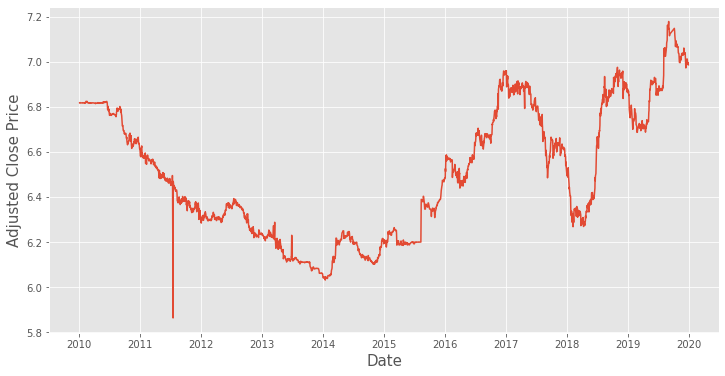

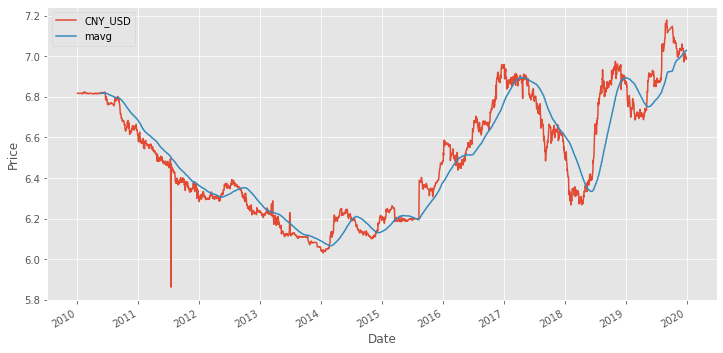

In [6]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.figure(figsize = (12,6))
plt.plot(exchange_train["Adj Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Adjusted Close Price',fontsize=15)
plt.show()
 
 
# Rolling mean
close_px = exchange_train['Adj Close']
mavg = close_px.rolling(window=100).mean()
 
plt.figure(figsize = (12,6))
close_px.plot(label='CNY_USD')
mavg.plot(label='mavg')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [7]:
import matplotlib.dates as mdates
 
# change the dates into ints for training
dates_exchange = exchange.copy()
dates_exchange = dates_exchange.reset_index()
 
# Store the original dates for plotting the predicitons
org_dates = dates_exchange['Date']
 
# convert to ints
dates_exchange['Date'] = dates_exchange['Date'].map(mdates.date2num)
 
dates_exchange.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3011,18864.0,6.4699,6.4783,6.4675,6.4699,6.4699,0.0
3012,18865.0,6.4749,6.4856,6.4725,6.4749,6.4749,0.0
3013,18866.0,6.4805,6.4867,6.4694,6.4805,6.4805,0.0
3014,18869.0,6.4708,6.4708,6.4577,6.4708,6.4708,0.0
3015,18870.0,6.4651,6.4709,6.4508,6.4651,6.4651,0.0


In [8]:
print(np.isnan(exchange).any())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


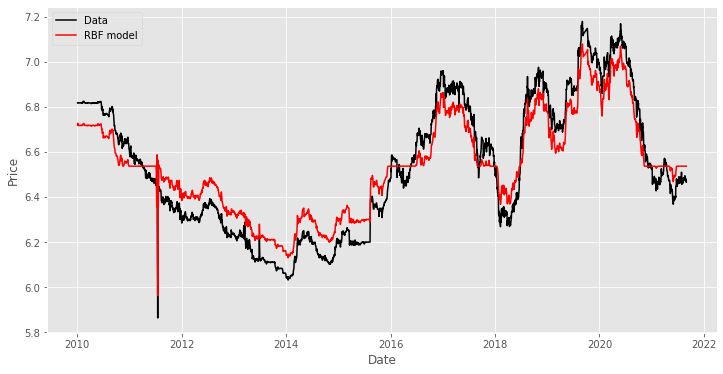

In [9]:
from sklearn.svm import SVR

dates_exchange[np.isnan(exchange_train)] = 7
dates_exchange[np.isinf(exchange_train)] = 7

dates = dates_exchange['Date'].values
prices = exchange['Adj Close'].values
 
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))
 
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)
y_predict = svr_rbf.predict(dates)
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, y_predict, color= 'red', label= 'RBF model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
train_data = exchange.loc[:,'Adj Close'].values
print(train_data.shape) # 3016 

(3016,)


In [12]:
from sklearn.metrics import mean_squared_error        # 均方根误差
from sklearn.metrics import mean_absolute_error       # 平均绝对误差
from sklearn.metrics import r2_score                  # 校正决定系数R方值
from sklearn.metrics import mean_squared_log_error    # 均方根对数误差
from sklearn.metrics import median_absolute_error     # 中位数绝对误差
from sklearn.metrics import explained_variance_score  # 解释回归模型的方差得分

In [13]:
print('平均绝对误差:', mean_absolute_error(prices, y_predict))
print('均方根误差:', mean_squared_error(prices, y_predict))
print('校正决定系数:', r2_score(prices, y_predict))
print('均方根对数误差:', mean_squared_log_error(prices, y_predict))
print('中位数绝对误差:', median_absolute_error(prices, y_predict))
print('解释回归模型的方差得分:', explained_variance_score(prices, y_predict))

平均绝对误差: 0.0862861419487926
均方根误差: 0.00799717034258006
校正决定系数: 0.9056611062935309
均方根对数误差: 0.0001417203272231809
中位数绝对误差: 0.09838362005518642
解释回归模型的方差得分: 0.9061724473266306


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
x_train,x_test,y_train,y_test=train_test_split(dates, prices,test_size=0.2,random_state=10)
#创建svR实例
svr=SVR(C=1, kernel='rbf', epsilon=0.2)
svr=svr.fit(x_train,y_train)
#预测
svr_predict=svr.predict(x_test)
#评价结果
mae = mean_absolute_error(y_test, svr_predict)
mse = mean_squared_error(y_test, svr_predict)
rmse = mean_squared_error(y_test, svr_predict)**0.5
evs = explained_variance_score(y_test, svr_predict)
r2 = r2_score(y_test, svr_predict)
print("MAE：", mae)
print("MSE：", mse)
print("RMSE：", rmse)
print("EVS：", evs)
print("R2：", r2)

MAE： 0.11527529090075431
MSE： 0.018753939864107446
RMSE： 0.13694502497026845
EVS： 0.8071514445774954
R2： 0.7934360872442137


In [15]:
# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)

scaler.fit(train_data)
train_data = scaler.transform(train_data)

In [16]:
'''Function to create a dataset to feed into an LSTM'''
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
    
    
# Create the data to train our model on:
time_steps = 36
X_train, y_train = create_dataset(train_data, time_steps)
 
# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 36, 1))
 
print(X_train.shape)
 
 
# Visualizing our data with prints:
print('X_train:')
print(str(scaler.inverse_transform(X_train[0])))
print("\n")
print('y_train: ' + str(scaler.inverse_transform(y_train[0].reshape(-1,1)))+'\n')

(2980, 36, 1)
X_train:
[[6.8169]
 [6.817 ]
 [6.8183]
 [6.8178]
 [6.8175]
 [6.8165]
 [6.8166]
 [6.8168]
 [6.817 ]
 [6.817 ]
 [6.8168]
 [6.8168]
 [6.8173]
 [6.8177]
 [6.817 ]
 [6.8169]
 [6.8166]
 [6.817 ]
 [6.8169]
 [6.8169]
 [6.817 ]
 [6.815 ]
 [6.8169]
 [6.8169]
 [6.8185]
 [6.817 ]
 [6.8166]
 [6.819 ]
 [6.8238]
 [6.8235]
 [6.8234]
 [6.8234]
 [6.8234]
 [6.8234]
 [6.8191]
 [6.8179]]


y_train: [[6.8182]]



In [17]:
# Build the model
model = keras.Sequential()
 
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
 
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
 
# Output layer
model.add(Dense(units = 1))
 
# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

Epoch 1/20
209/209 [==============================] - 22s 72ms/step - loss: 0.0039 - val_loss: 0.0016
Epoch 2/20
209/209 [==============================] - 13s 63ms/step - loss: 0.0018 - val_loss: 7.9712e-04
Epoch 3/20
209/209 [==============================] - 13s 64ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
209/209 [==============================] - 13s 62ms/step - loss: 0.0013 - val_loss: 5.9531e-04
Epoch 5/20
209/209 [==============================] - 13s 64ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/20
209/209 [==============================] - 13s 64ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 7/20
209/209 [==============================] - 13s 64ms/step - loss: 0.0012 - val_loss: 5.4332e-04
Epoch 8/20
209/209 [==============================] - 13s 64ms/step - loss: 9.7551e-04 - val_loss: 0.0010
Epoch 9/20
209/209 [==============================] - 13s 65ms/step - loss: 9.5735e-04 - val_loss: 4.6728e-04
Epoch 10/20
209/209 [==============================] - 13s

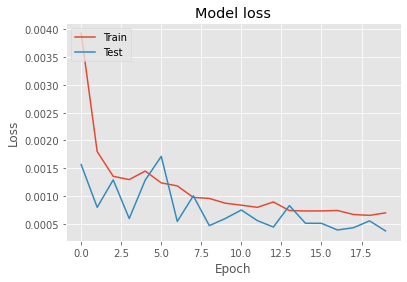

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

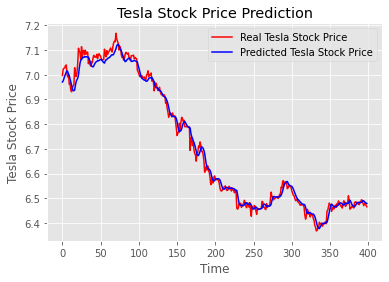

In [20]:
test_data = exchange_test['Adj Close'].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)
 
# Create the data to test our model on:
time_steps = 36
X_test, y_test = create_dataset(test_data, time_steps)
 
# store the original vals for plotting the predictions
y_test = y_test.reshape(-1,1)
org_y = scaler.inverse_transform(y_test)
 
# reshape it [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], 36, 1))
 
# Predict the prices with the model
predicted_y = model.predict(X_test)
predicted_y = scaler.inverse_transform(predicted_y)
 
 
# plot the results
plt.plot(org_y, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_y, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [21]:
print('平均绝对误差:', mean_absolute_error(org_y, predicted_y))
print('均方根误差:', mean_squared_error(org_y, predicted_y))
print('校正决定系数:', r2_score(org_y, predicted_y))
print('均方根对数误差:', mean_squared_log_error(org_y, predicted_y))
print('中位数绝对误差:', median_absolute_error(org_y, predicted_y))
print('解释回归模型的方差得分:', explained_variance_score(org_y, predicted_y))

平均绝对误差: 0.016884293348269405
均方根误差: 0.0005325327150301188
校正决定系数: 0.9920028239135377
均方根对数误差: 8.773626488706433e-06
中位数绝对误差: 0.012552171325684647
解释回归模型的方差得分: 0.9920271570021213
